In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import binom
%matplotlib inline
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from scipy.stats import chi2_contingency, ttest_ind
from pandas.plotting import scatter_matrix
import scipy.stats as st
import statistics as stats

In [2]:
df3 = pd.read_csv("DF2_STATS.csv")

# Dealing with outliers

In [3]:
cat_features = df3.select_dtypes('object').copy()
num_features = df3.select_dtypes(['float64', 'int64']).copy()
cat_features.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Male,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Sales,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


In [4]:
num_features.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Zscore
0,41.920786,1.016716,1.770313,2.146294,3.426960,2.464492,3.397665,6438.949336,7.077818,9.898765,...,1.012832,0.000000,8.063833,0.000000,1.052104,5.795945,3.993896,0.000000,4.594972,0.580921
1,51.589037,6.920808,1.035333,3.470803,1.813458,1.788697,1.584059,4457.659622,1.114423,14.495151,...,4.312008,1.104642,8.965059,3.264952,2.526470,10.070232,7.937505,1.032295,5.901207,1.610741
2,33.131540,2.198662,2.118801,3.979420,1.877226,0.833488,3.301009,2124.545220,5.539591,15.401596,...,2.332558,0.000000,8.427238,3.004521,2.924784,0.000000,0.000000,0.000000,0.000000,-0.355272
3,34.707073,2.937851,3.670674,3.734705,2.932646,1.095372,3.220844,2771.699080,0.772793,9.757546,...,3.029591,0.000000,7.662606,2.856001,3.117053,8.435324,5.563667,2.845429,0.000000,-0.187453
4,24.790188,1.988953,1.120496,1.079412,3.117739,0.937746,1.697330,3254.601575,10.118125,11.920147,...,2.720431,0.953012,6.241733,2.814719,3.112317,2.040124,1.970786,2.495949,2.219353,-1.243757


In [5]:
def plot_numeric_variable_boxplots(df3):
    numerical_vars = df3.select_dtypes(include=['float64', 'int64']).columns
    num_vars = len(numerical_vars)
    rows = (num_vars // 4) + (num_vars % 4)
    
    fig, axs = plt.subplots(rows, 4, figsize=(20, 6*rows))
    axs = axs.flatten()
    
    for i, var in enumerate(numerical_vars):
        sns.boxplot(data=df3, x=var, ax=axs[i])
        axs[i].set_title(f"Boxplot of {var}")
    
    for i in range(num_vars, 4*rows):
        fig.delaxes(axs[i])
    
    plt.tight_layout()
    plt.show()

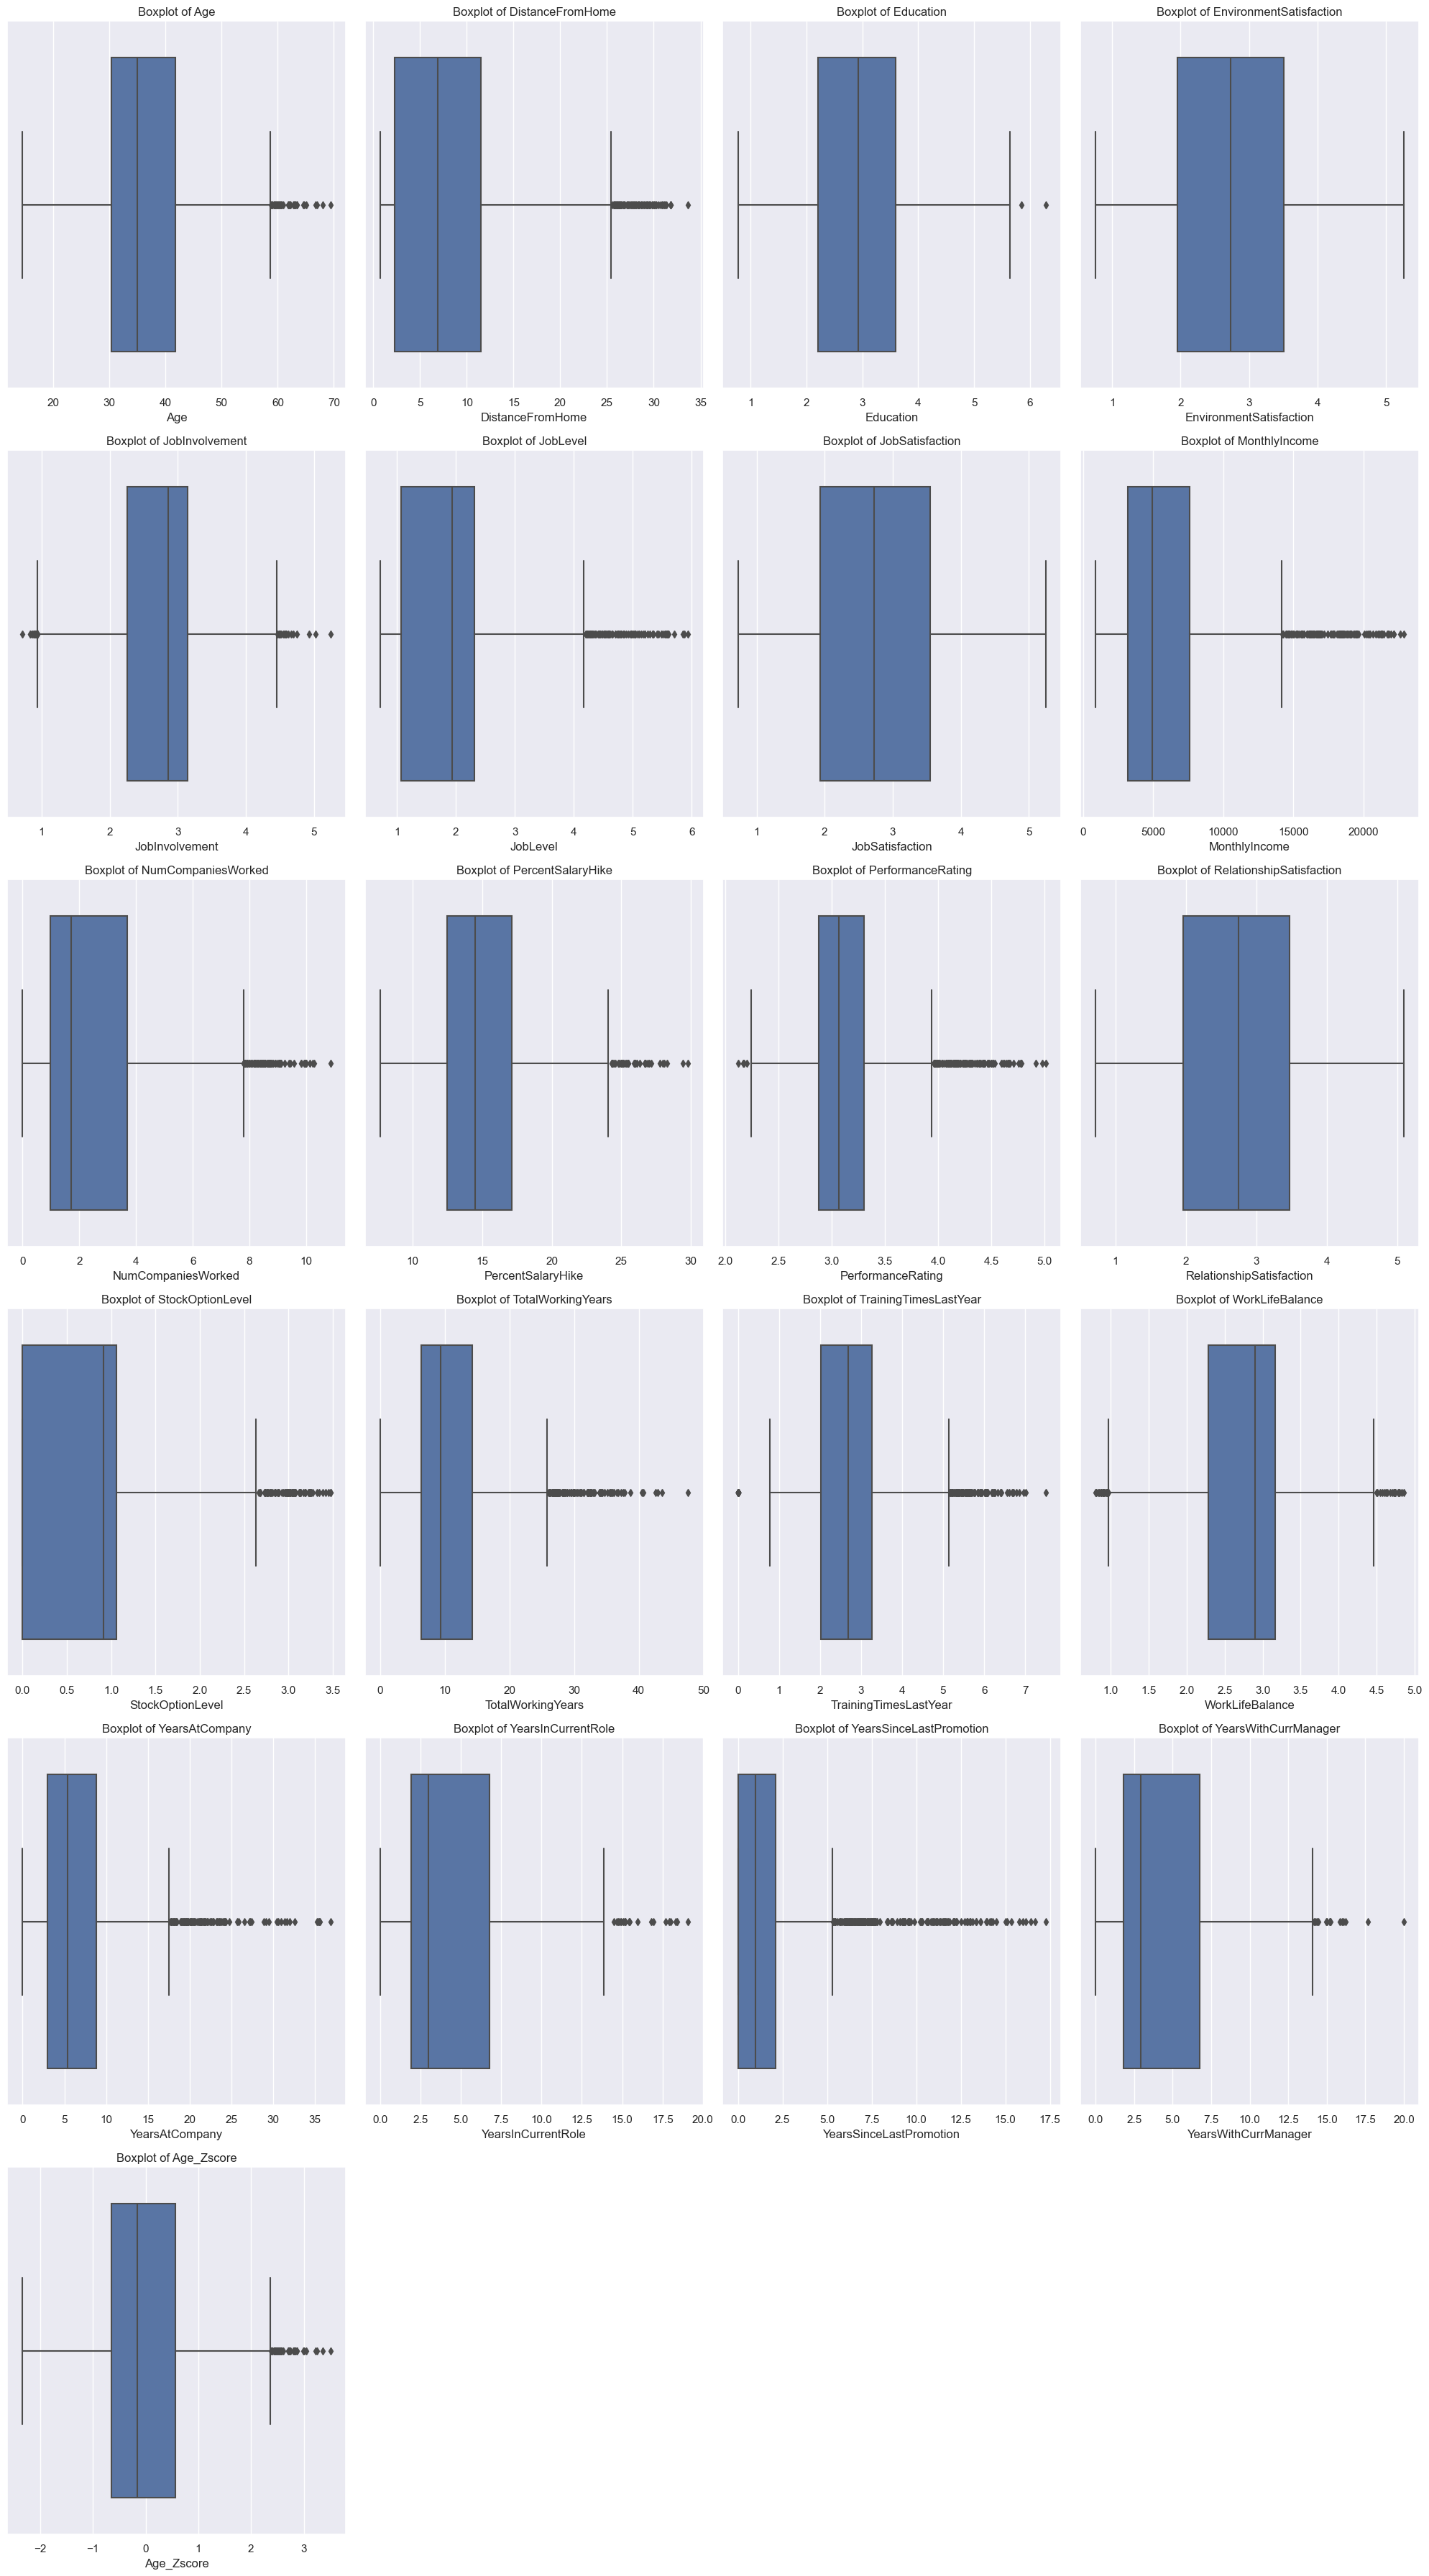

In [6]:
plot_numeric_variable_boxplots(num_features)

In [7]:
def replace_outliers_with_upper(dataframe, method='iqr', multiplier=1.5):
    numerical_vars = dataframe.select_dtypes(include=['float64', 'int64']).columns
    for var in numerical_vars:
        if method == 'iqr':
            Q1 = dataframe[var].quantile(0.25)
            Q3 = dataframe[var].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - multiplier * IQR
            upper_bound = Q3 + multiplier * IQR
            dataframe[var] = np.where(dataframe[var] >= upper_bound, upper_bound, dataframe[var])
        elif method == 'std':
            mean = dataframe[var].mean()
            std = dataframe[var].std()
            lower_bound = mean - multiplier * std
            upper_bound = mean + multiplier * std
            dataframe[var] = np.where(dataframe[var] >= upper_bound, dataframe[dataframe[var] <= upper_bound][var].max(), dataframe[var])
        else:
            raise ValueError("Invalid method. Choose either 'iqr' or 'std'.")
    return dataframe

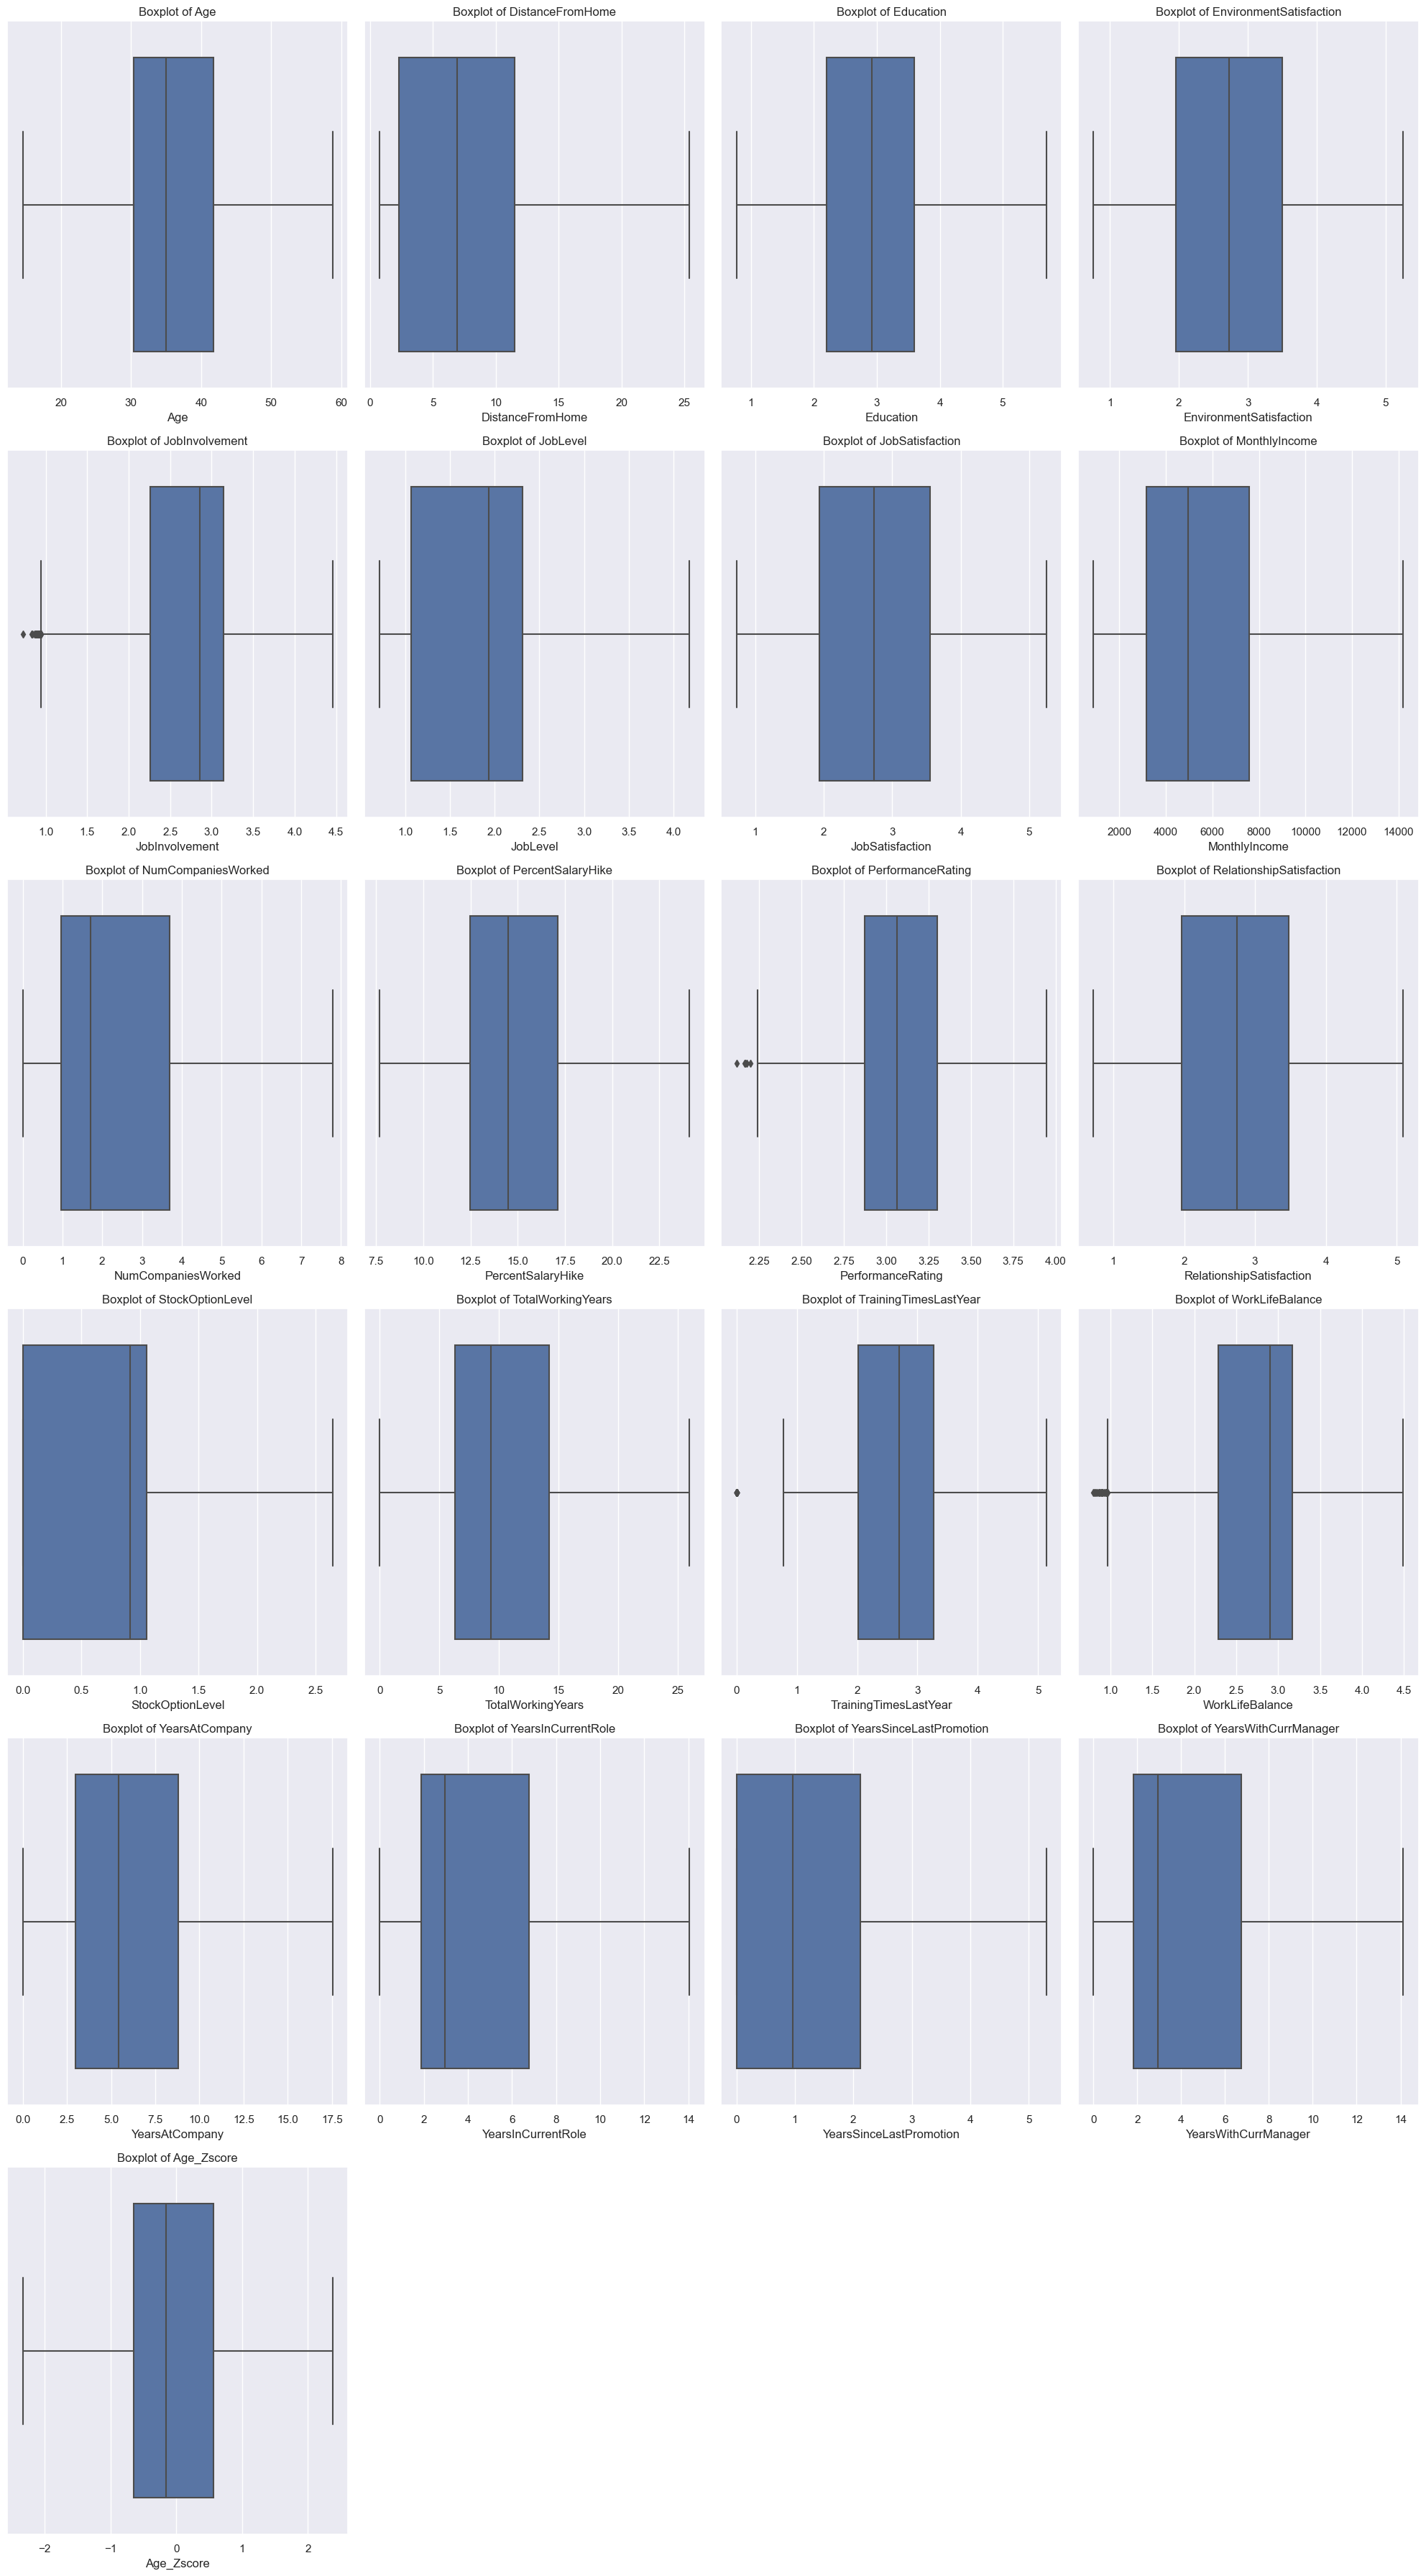

In [8]:
num_features = replace_outliers_with_upper(num_features)
plot_numeric_variable_boxplots(num_features)

In [9]:
num_columns = list(num_features.columns)
cat_columns = list(cat_features.columns)

In [10]:
df3[num_columns] = num_features
df3[cat_columns] = cat_features
df3.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Zscore
0,41.920786,Yes,Travel_Rarely,Sales,1.016716,1.770313,Life Sciences,2.146294,Male,3.426960,...,1.012832,0.000000,8.063833,0.000000,1.052104,5.795945,3.993896,0.000000,4.594972,0.580921
1,51.589037,No,Travel_Frequently,Research & Development,6.920808,1.035333,Life Sciences,3.470803,Male,1.813458,...,4.312008,1.104642,8.965059,3.264952,2.526470,10.070232,7.937505,1.032295,5.901207,1.610741
2,33.131540,Yes,Travel_Rarely,Research & Development,2.198662,2.118801,Other,3.979420,Male,1.877226,...,2.332558,0.000000,8.427238,3.004521,2.924784,0.000000,0.000000,0.000000,0.000000,-0.355272
3,34.707073,No,Travel_Frequently,Sales,2.937851,3.670674,Life Sciences,3.734705,Female,2.932646,...,3.029591,0.000000,7.662606,2.856001,3.117053,8.435324,5.563667,2.845429,0.000000,-0.187453
4,24.790188,No,Travel_Rarely,Research & Development,1.988953,1.120496,Medical,1.079412,Male,3.117739,...,2.720431,0.953012,6.241733,2.814719,3.112317,2.040124,1.970786,2.495949,2.219353,-1.243757


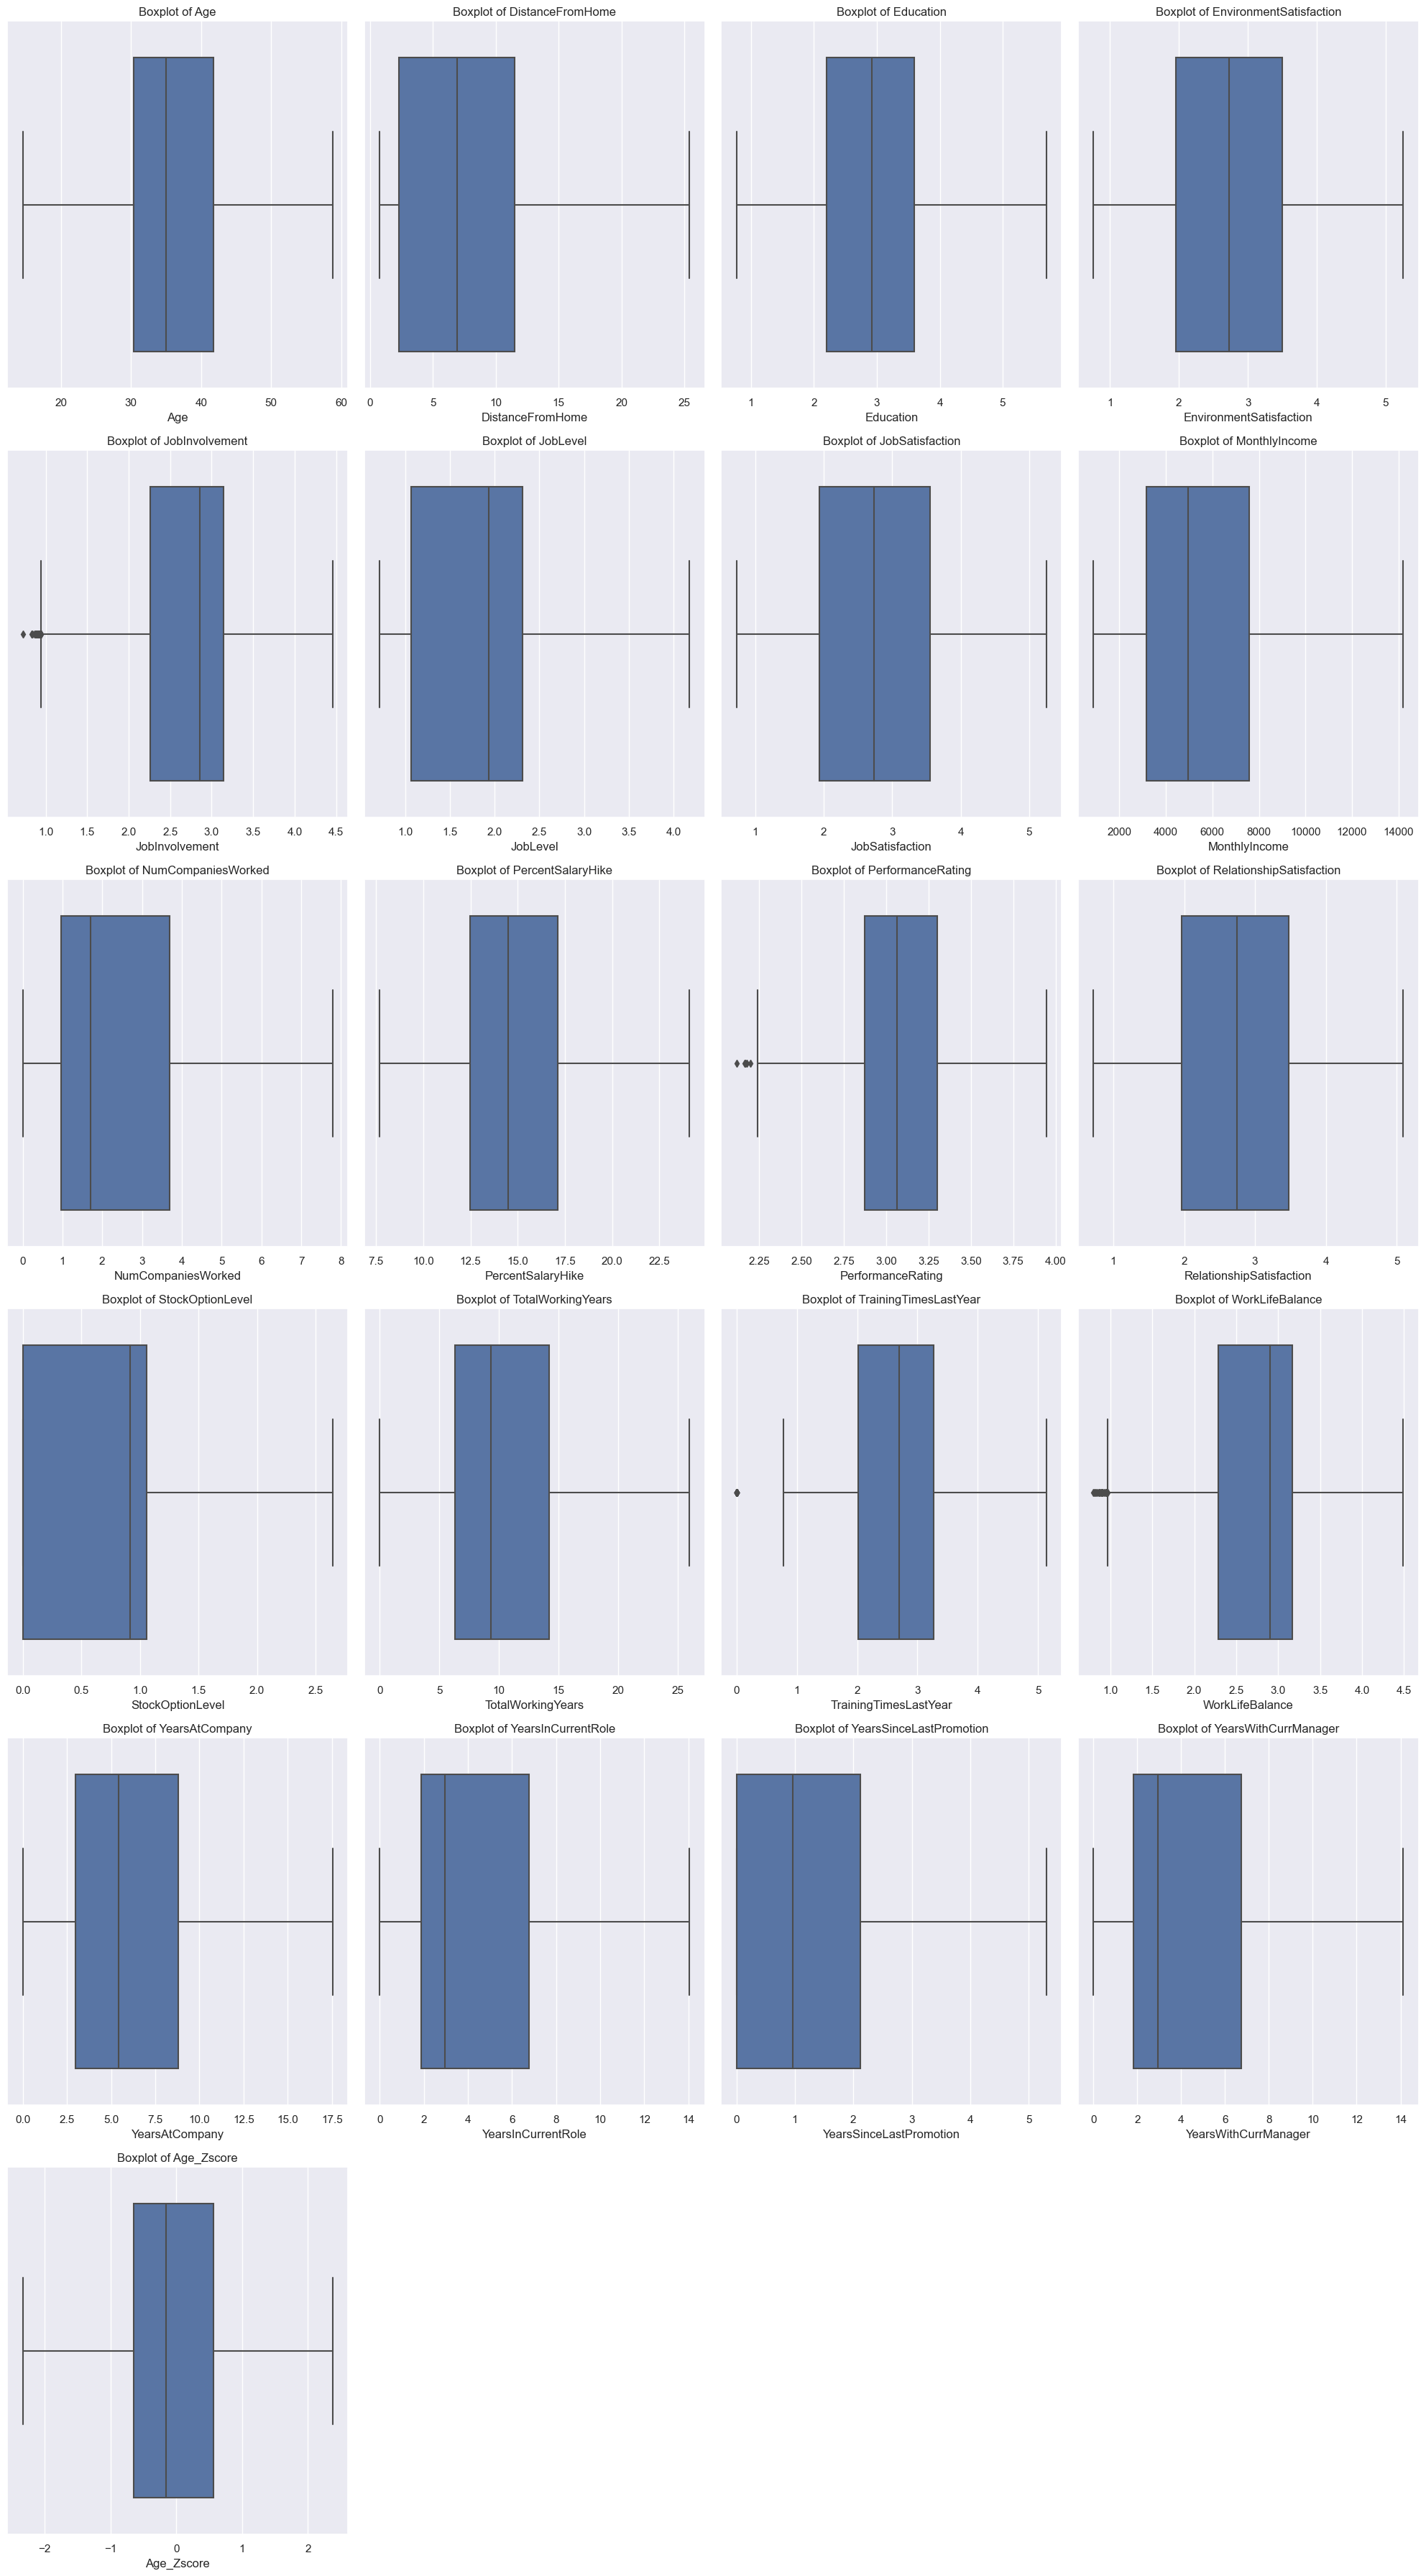

In [15]:
plot_numeric_variable_boxplots(df3)

# Encoding

In [11]:
df4=df3.copy()

In [12]:
#convert category attributes with only 2 distinct values to numeric by assigning labels
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df4['Attrition']=label_encoder.fit_transform(df3['Attrition'])
df4['OverTime']=label_encoder.fit_transform(df3['OverTime'])
df4['Gender']=label_encoder.fit_transform(df3['Gender'])

In [13]:
#convert category attributes with more than 2 distinct values to numeric using one-hot vector
df4=pd.get_dummies(df4, columns=['BusinessTravel', 'Department', 'EducationField', 
                               'JobRole', 'MaritalStatus'])

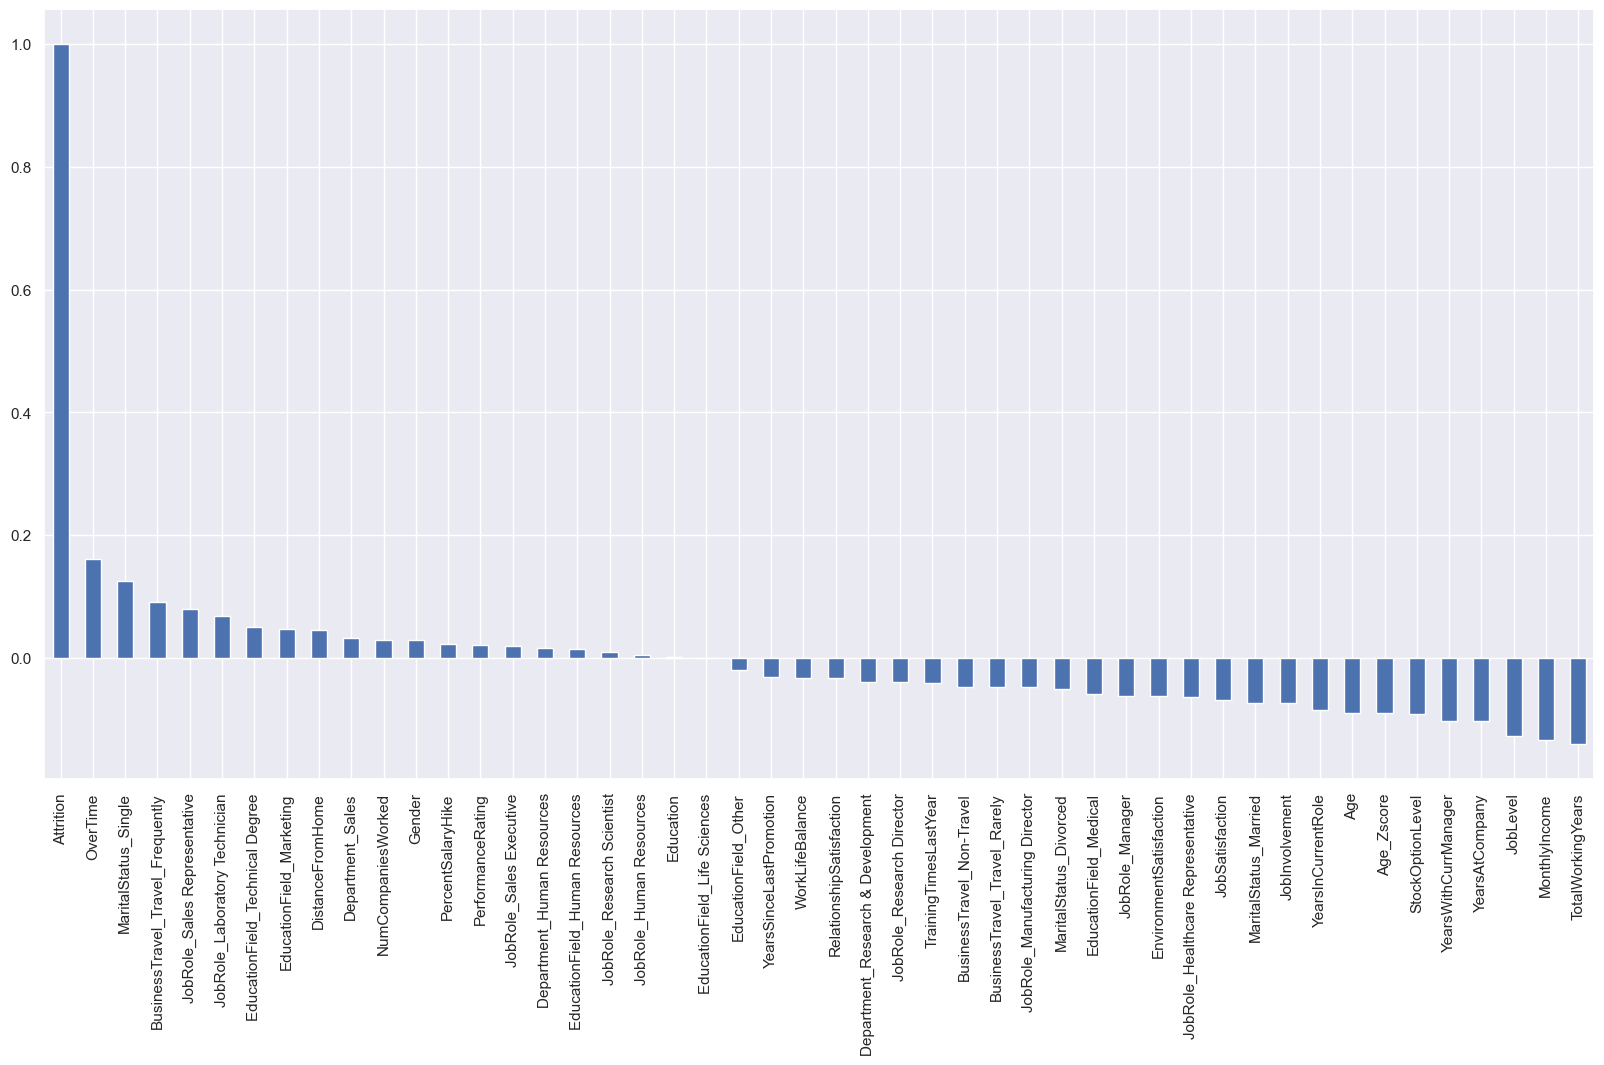

In [14]:
plt.figure(figsize=(20,10))
correlations=df4.corr()
correlations['Attrition'].sort_values(ascending = False).plot(kind='bar');

# LDA

In [19]:
np.set_printoptions(precision=4)
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [21]:
# Apply Linear Discriminant Analysis (LDA)
X = df4.drop('Attrition', axis=1)
y = df4['Attrition']  

X.shape


(1470, 47)

In [23]:
#df4.target_names


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Train a Logistic Regression model on the LDA-transformed training data
model = LogisticRegression()
model.fit(X_train_lda, y_train)

# Make predictions on the LDA-transformed test data
y_pred = model.predict(X_test_lda)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.84
